# Introduction

The purpose of this lab is to become familiar with data aquisition, as well as performing statistical analysis on the aquired data. Throughout the lab, exercises will be completed that involve: plotting of normal distributions, plotting of histograms, importing data, Visalizing data, and comparing genuine and imposter signatures. Additionally, there is heavy emphasis on the analysis and interpretation of produced statistical data throughout the lab.

In [112]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
import pandas as pd

# Exercise 1

In [113]:
#Theoretical mean and std
mu = 50
std = 5
qtt_samples = 80

pop_norm = norm.rvs(mu, std, size=qtt_samples)
pop_norm

array([49.46097079, 46.4525666 , 55.35196622, 42.40002445, 49.12875039,
       53.87234617, 50.92113023, 53.69876397, 50.59523382, 52.655759  ,
       49.80935888, 64.87399677, 49.67609838, 48.53963178, 47.47102722,
       53.87988714, 43.74901627, 48.57978668, 53.09961783, 47.69415608,
       51.7129205 , 63.77563706, 54.32511371, 52.0456018 , 30.4980092 ,
       41.1111493 , 51.49108756, 54.51435876, 49.2177522 , 44.08641592,
       44.30849681, 54.56855492, 51.4021867 , 52.02441151, 51.28529771,
       48.19433924, 61.46764454, 58.59651908, 50.93898515, 57.53966264,
       45.62080958, 53.6163776 , 47.8772652 , 51.67695367, 50.54814509,
       54.99908647, 48.99017601, 50.21354988, 49.29611705, 50.59484248,
       48.81105193, 53.51648713, 50.5897218 , 51.27996119, 47.48609363,
       53.87655225, 57.19365352, 53.69157504, 50.41434113, 56.644072  ,
       49.29865811, 45.13936107, 42.00823694, 53.3953777 , 50.68286396,
       42.46542326, 51.43081252, 52.62440928, 48.30858152, 42.98

REAL mean: 50.64; std: 5.28


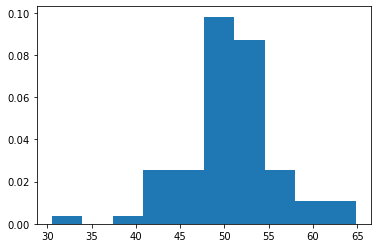

In [114]:
plt.hist(pop_norm, bins = 10, density=True);
print('REAL mean: %.2f; std: %.2f' % (np.mean(pop_norm), np.std(pop_norm)))

In [115]:
#Now we consider the larger sample size
mu_two = 50
std_two = 5
qtt_samples_two = 1000

pop_norm_two = norm.rvs(mu_two, std_two, size = qtt_samples_two)
pop_norm_two

array([47.99280163, 51.70144127, 53.1781617 , 50.65015889, 52.98206789,
       52.62838145, 45.22495384, 47.60193694, 51.05896828, 47.7965796 ,
       52.38428066, 48.12891232, 39.86869624, 51.33729331, 47.59767201,
       54.62573028, 48.78647019, 46.9514891 , 52.39689705, 54.11193146,
       53.69700445, 50.43047271, 45.11214432, 42.70727368, 64.58017644,
       40.71016525, 39.53042033, 50.48976045, 56.06973129, 42.87282096,
       51.78368744, 44.27952237, 46.87824964, 52.62535192, 44.35239865,
       45.93978329, 42.31021846, 53.89989897, 48.58033286, 45.72066208,
       55.95517551, 48.72763544, 50.88059418, 40.64386892, 45.82478485,
       57.41340069, 48.69708374, 49.84985443, 59.02043037, 50.33147452,
       41.92255272, 52.13319683, 45.54813807, 49.80719936, 49.14074666,
       40.02602399, 57.95554096, 47.20768438, 57.64328546, 48.52200679,
       51.09096418, 45.51040063, 44.1060952 , 42.48040041, 49.91814851,
       51.40948349, 52.59708096, 48.96685617, 57.79467211, 59.19

REAL mean: 50.02; std: 5.12


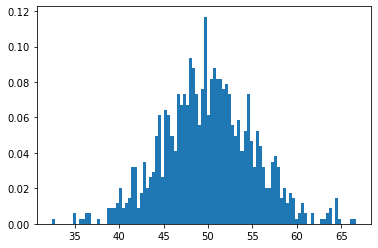

In [116]:
plt.hist(pop_norm_two, bins = 100, density=True);
print('REAL mean: %.2f; std: %.2f' % (np.mean(pop_norm_two), np.std(pop_norm_two)))

# Exercise 1 Conclusion

The first set calculated a mean of **49.26** and a standard deviation of **4.97**. The second set had a mean of **50.27** and a standard deviation of **4.96**. It appears that the first plot, although the actual values of the mean and standard deviation were relatively close to the theoretical values, there was slight discrepancy in each. It is evident that by increasing the sample size and the number of bins considered, the histogram of the second set resembles more of a normal distribution. Additionally, the real mean of the second set is closer to the actual value than the first set. Both standard deviations are approximately the same. Overall we can conclude that as we increase sample size, and number of bins, the plot resembles a normal distribution more and more, the sample mean and standard deviation therefore approach the theoretical mean and standard deviation as the set approaches a normal distribution.

# Exercise 2

In [117]:
# ’signature samples/biometrics/’
# ’signature samples/calgary/’
# ’signature samples/hello/’

# ’genuine’ or ’impostor’
subdir = 'impostor/'
data_dir = 'signature_samples/biometrics/' + subdir

csv_file = pd.read_csv( data_dir + '1.csv')
# show the first lines of the data loaded
# the file contains 4 columns: [X, Y, Time , Pressure]
csv_file.head ()

,X,Y,Pressure,Time
0,67.631005,41.681700,0.162419,0
1,67.631005,40.666956,0.273965,14
2,67.631005,41.681700,0.180029,14
3,67.631005,41.681700,0.217200,14
4,67.631005,40.666956,0.336589,29


In [118]:
# splitting the original data/matrix into 3 variables
coord1 = csv_file[['X', 'Y']].to_numpy()
time1 = csv_file['Time'].to_numpy().reshape((-1,1))
prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))

In [119]:
# to correctly map the pressure into the colormap the normalization is required 
prs1 = prs1 / np.max(prs1) * 255
prs1 = prs1.astype(int)

pressuremap = cm.get_cmap('jet', np.max(prs1)+1)

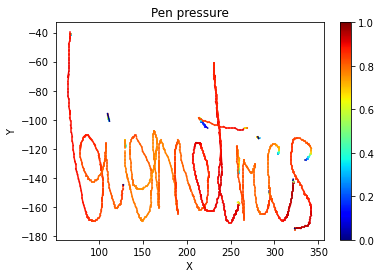

In [120]:
for i in range(len(prs1)-1):
    c = pressuremap(prs1[i]).squeeze()
    
    time_diff = abs(time1[i+1] - time1[i])
    if time_diff == 0:
        time_diff = 0.0001
        
    if time_diff < 17: # You may need to change this threshold
        im = plt.plot(coord1[i:i+2,0], -coord1[i:i+2,1], c=c)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pen pressure')

sm = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm);

In [121]:
#Calculating the mean and standard deviation of one imposter signature and one genuine signature
#We will then plot the normal distribution

#Using signatures in the calgary folder: 'signature samples/calgary/'
genuine_sub = 'genuine/'
imposter_sub = 'impostor/'

cal_gen_directory = 'signature_samples/calgary/' + genuine_sub
cal_imp_directory = 'signature_samples/calgary/' + imposter_sub

gen_csv = pd.read_csv( cal_gen_directory + '22.csv')
imp_csv = pd.read_csv( cal_imp_directory + '22.csv')

In [122]:
#head of genuine csv
gen_csv.head()

,X,Y,Pressure,Time
0,232.561968,186.449507,0.184371,0
1,232.561968,186.449507,0.213187,14
2,232.561968,186.449507,0.225153,14
3,232.561968,186.449507,0.223443,30
4,232.561968,186.449507,0.225153,30


In [123]:
#head of genuine csv
imp_csv.head()

,X,Y,Pressure,Time
0,108.479301,92.184735,0.011719,0
1,108.479301,92.184735,0.029328,1
2,108.479301,92.184735,0.058687,1
3,108.479301,92.184735,0.076296,15
4,108.479301,92.184735,0.076296,15


In [124]:
# splitting the original data/matrix into 3 variables for both genuine and impostor distributions
gen_coord = gen_csv[['X', 'Y']].to_numpy()
gen_time = gen_csv['Time'].to_numpy().reshape((-1,1))
gen_prs = gen_csv['Pressure'].to_numpy().reshape((-1,1))

imp_coord = imp_csv[['X', 'Y']].to_numpy()
imp_time = imp_csv['Time'].to_numpy().reshape((-1,1))
imp_prs = imp_csv['Pressure'].to_numpy().reshape((-1,1))

In [125]:
#Normal distribution, mean, and standard deviation of genuine set, as well as the signature provided
gen_mean = np.mean(gen_prs)
gen_std = np.std(gen_prs)
gen_norm = norm.pdf(gen_prs, loc = gen_mean, scale = gen_std)

gen_prs = gen_prs / np.max(gen_prs) * 255
gen_prs = gen_prs.astype(int)

pressuremap_gen = cm.get_cmap('jet', np.max(gen_prs)+1)

REAL mean: 0.31; std: 0.04


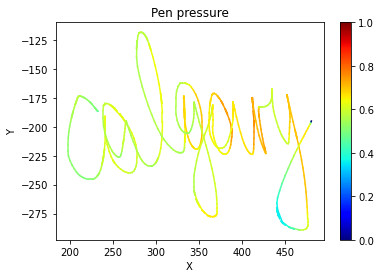

In [126]:
for i in range(len(gen_prs)-1):
    c_gen = pressuremap(gen_prs[i]).squeeze()
    
    time_diff_gen = abs(gen_time[i+1] - gen_time[i])
    if time_diff_gen == 0:
        time_diff_gen = 0.0001
        
    if time_diff_gen < 17: # You may need to change this threshold
        im = plt.plot(gen_coord[i:i+2,0], -gen_coord[i:i+2,1], c=c_gen)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pen pressure')

sm_gen = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm_gen);
print('REAL mean: %.2f; std: %.2f' % (gen_mean, gen_std))

In [127]:
#Normal distribution, mean, and standard deviation of impostor set, as well as the signature provided
imp_mean = np.mean(imp_prs)
imp_std = np.std(imp_prs)
imp_norm = norm.pdf(imp_prs, loc = imp_mean, scale = imp_std)

imp_prs = imp_prs / np.max(imp_prs) * 255
imp_prs = imp_prs.astype(int)

pressuremap_imp = cm.get_cmap('jet', np.max(imp_prs)+1)

REAL mean: 0.45; std: 0.06


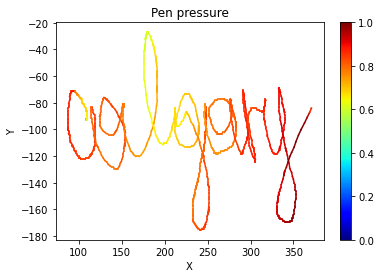

In [128]:
for i in range(len(imp_prs)-1):
    c_imp = pressuremap(imp_prs[i]).squeeze()
    
    time_diff_imp = abs(imp_time[i+1] - imp_time[i])
    if time_diff_imp == 0:
        time_diff_imp = 0.0001
        
    if time_diff_imp < 17: # You may need to change this threshold
        im = plt.plot(imp_coord[i:i+2,0], -imp_coord[i:i+2,1], c=c_imp)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pen pressure')

sm_imp = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm_imp);
print('REAL mean: %.2f; std: %.2f' % (imp_mean, imp_std))

# Exercise 3

The purpose of the line **if time == 0** is used as a guard to prevent division by 0 when computing the **velocity as distance/time**.

# Exercise 4

In [129]:
def calc_velocity(time, coords):
    vel = np.zeros((len(time)-1, 1))

    for i in range(len(time)-1):
        distance = np.sqrt((coords[i+1,0] - coords[i,0])**2 +
                           (coords[i+1,1] - coords[i,1])**2)
        
        # if too fast time_diff = 0
        time_diff = time[i+1] - time[i]
        if time_diff == 0:
            time_diff = 0.0001

        vel[i] = distance / time_diff
        vel[i] = int(vel[i] * 1000) + 1

    vel = np.insert(vel, 0, 1)
    vel = vel / np.max(vel) * 255
    vel = vel.astype(int)
    
    return vel

In [151]:
#Genuine
# columns: mean_vel, std_vec, mean_prs, std_prs
stats_measures_gen = np.zeros((30,4))

# using 10-30 signatures
for i in range(30):
    csv_file_gen = pd.read_csv(cal_gen_directory + '%d.csv' % (i+1))
    
    coord1_gen = csv_file_gen[['X', 'Y']].to_numpy()
    time1_gen = csv_file_gen['Time'].to_numpy().reshape((-1,1))
    prs1_gen = csv_file_gen['Pressure'].to_numpy().reshape((-1,1))

    vel_gen = calc_velocity(time1_gen, coord1_gen)
    
    stats_measures_gen[i, 0] = np.mean(vel_gen)
    stats_measures_gen[i, 1] = np.std(vel_gen)
    
    stats_measures_gen[i, 2] = np.mean(prs1_gen)
    stats_measures_gen[i, 3] = np.std(prs1_gen)
    

REAL mean: 0.27; std: 0.04


Text(0.5, 1.0, 'Real Average Genuine Pressure Distribution')

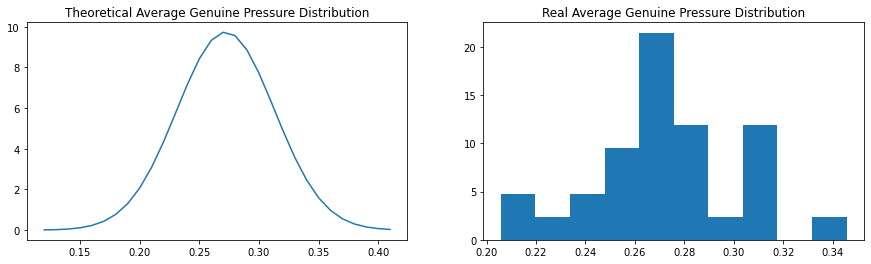

In [152]:
#genuine normal distribution pressure
gen_mean_press = np.mean(stats_measures_gen[:,2])
gen_std_press = np.mean(stats_measures_gen[:,3])
x_gen_press = np.arange(0.12, 0.42, 0.01)
n_gen_press = norm(gen_mean_press, gen_std_press)

print('REAL mean: %.2f; std: %.2f' % (gen_mean_press, gen_std_press))

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(x_gen_press, n_gen_press.pdf(x_gen_press));
plt.title('Theoretical Average Genuine Pressure Distribution')

plt.subplot(1,2,2)
plt.hist(stats_measures_gen[:,2], bins = 10, density=True);
plt.title('Real Average Genuine Pressure Distribution')

REAL mean: 18.40; std: 42.65


Text(0.5, 1.0, 'Real Average Genuine Velocity Distribution')

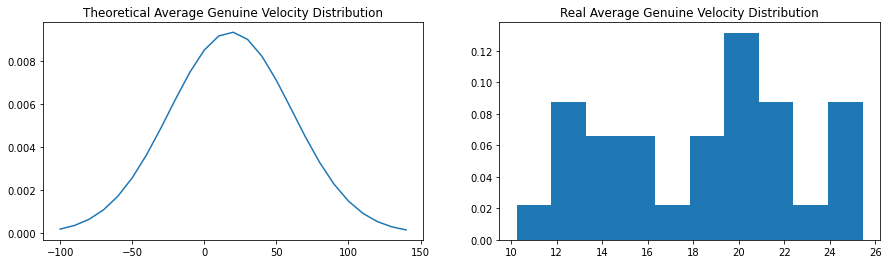

In [153]:
#genuine normal distribution velocity
gen_mean_vel = np.mean(stats_measures_gen[:,0])
gen_std_vel = np.mean(stats_measures_gen[:,1])
x_gen_vel = np.arange(-100, 150, 10)
n_gen_vel = norm(gen_mean_vel, gen_std_vel)

print('REAL mean: %.2f; std: %.2f' % (gen_mean_vel, gen_std_vel))

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(x_gen_vel, n_gen_vel.pdf(x_gen_vel));
plt.title('Theoretical Average Genuine Velocity Distribution')

plt.subplot(1,2,2)
plt.hist(stats_measures_gen[:,0], bins = 10, density=True);
plt.title('Real Average Genuine Velocity Distribution')

# Exercise 5

In [154]:
#imposter
# columns: mean_vel, std_vec, mean_prs, std_prs
stats_measures_imp = np.zeros((30,4))

# using 10-30 signatures
for i in range(30):
    csv_file_imp = pd.read_csv(cal_imp_directory + '%d.csv' % (i+1))
    
    coord1_imp = csv_file_imp[['X', 'Y']].to_numpy()
    time1_imp = csv_file_imp['Time'].to_numpy().reshape((-1,1))
    prs1_imp = csv_file_imp['Pressure'].to_numpy().reshape((-1,1))

    vel_imp = calc_velocity(time1_imp, coord1_imp)
    
    stats_measures_imp[i, 0] = np.mean(vel_imp)
    stats_measures_imp[i, 1] = np.std(vel_imp)
    
    stats_measures_imp[i, 2] = np.mean(prs1_imp)
    stats_measures_imp[i, 3] = np.std(prs1_imp)
    

REAL mean: 0.51; std: 0.07


Text(0.5, 1.0, 'Real Average Impostor Pressure Distribution')

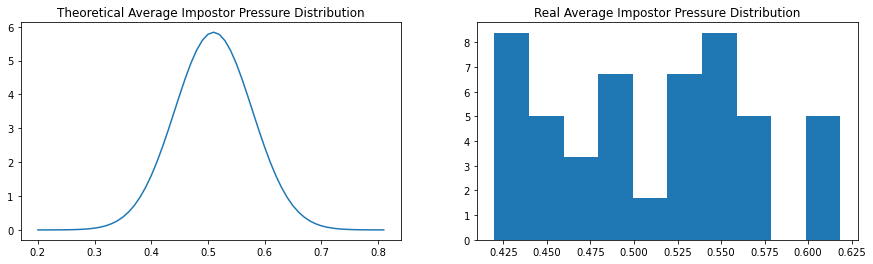

In [155]:
#imposter normal distribution pressure
imp_mean_press = np.mean(stats_measures_imp[:,2])
imp_std_press = np.mean(stats_measures_imp[:,3])
x_imp_press = np.arange(0.2, 0.82, 0.01)
n_imp_press = norm(imp_mean_press, imp_std_press)

print('REAL mean: %.2f; std: %.2f' % (imp_mean_press, imp_std_press))

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(x_imp_press, n_imp_press.pdf(x_imp_press));
plt.title('Theoretical Average Impostor Pressure Distribution')

plt.subplot(1,2,2)
plt.hist(stats_measures_imp[:,2], bins = 10, density=True);
plt.title('Real Average Impostor Pressure Distribution')

REAL mean: 12.55; std: 30.80


Text(0.5, 1.0, 'Real Average Impostor Velocity Distribution')

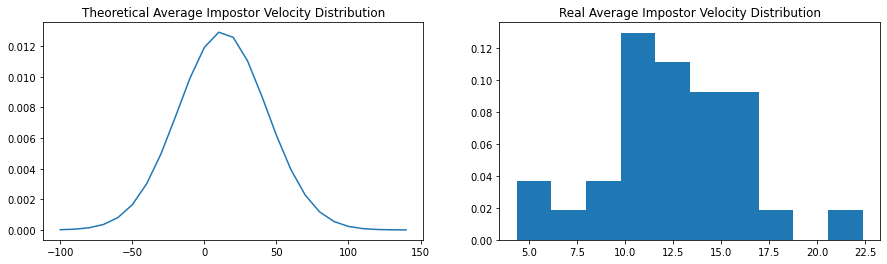

In [156]:
#imposter normal distribution velocity
imp_mean_vel = np.mean(stats_measures_imp[:,0])
imp_std_vel = np.mean(stats_measures_imp[:,1])
x_imp_vel = np.arange(-100, 150, 10)
n_imp_vel = norm(imp_mean_vel, imp_std_vel)

print('REAL mean: %.2f; std: %.2f' % (imp_mean_vel, imp_std_vel))

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(x_imp_vel, n_imp_vel.pdf(x_imp_vel));
plt.title('Theoretical Average Impostor Velocity Distribution')

plt.subplot(1,2,2)
plt.hist(stats_measures_imp[:,0], bins = 10, density=True);
plt.title('Real Average Impostor Velocity Distribution')

To summarize, a genuine signature on average is performed while pressing less intensly on the tablet, an average genuine signature has a pressure of 0.27, while an average forged signature has a pressure of 0.57. A genuine signature is on average, performed faster than an imposter signature. An average genuine signature is performed at 18.40 while an imposter signature is done at an average of 12.55. These results are expected since an individual genuinely signing will be more comfortable (can sign fast and does not require additional pressure since they are not attempting to mimic a signature). An imposter will however attempt to mimic the signature perfectly (increased pressure and decreased speed in an attempt to mimic the genuine signature).

# Conclusion

Exercise 1 was used to observe the effect of varying the sample size of a dataset. Overall, increasing the sample size of a dataset, as well as the number of bins of its histogram creates more and more of a distribution that resembles a probability density function. Exercise 2 allowed students to familiarize themselves with data visualization, in this case, a signature. Exercise 3 simply aimed to test the attentiveness of students, the line of code written is used as a guard to avoid division by zero. Exercises 4 and 5 allowed students to perform statistical analysis on 30 genuine, and 30 imposter signatures. Average velocity and pressure for each of the 30 signatures are plotted, and the statistical data is analyzed. When comparing the two distributions, it is evident that there is a significant difference between the mean, and standard deviations of imposter and genuine pressure and velocity. The values implied that a genuine signature does not require much thought to perform, while an imposter signature requires focus, the results are reflected since the average pressure and average velocity are increased and decreased respectively for an imposter signature.